In [34]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph,START,END
from langchain_core.prompts import PromptTemplate
from IPython.display import Image
from typing import TypedDict
load_dotenv()

True

In [35]:
model=ChatGoogleGenerativeAI(model='gemini-2.5-pro')

In [36]:
class LLMState(TypedDict):
    question:str
    response:str

In [37]:
graph=StateGraph(LLMState)

In [38]:
def qa(state:LLMState)->LLMState:
    question=state['question']
    prompt=f'Tell me about the answer of the given question {question}'
    results=model.invoke(prompt).content
    state['response']=results
    return state   

In [39]:
graph.add_node('qa',qa)
graph.add_edge(START,'qa')
graph.add_edge('qa',END)
workflow=graph.compile()

In [40]:
output_state=workflow.invoke({'question':'Tell me about AI'})
output_state

{'question': 'Tell me about AI',
 'response': 'Of course. Your question is interesting because it\'s a "meta-question." You\'re not just asking "Tell me about AI," but rather asking me to explain *how one would construct a good answer* to that question.\n\nA truly effective answer to "Tell me about AI" shouldn\'t be a single block of text. It needs to be structured and layered, moving from a simple core concept to more complex details, applications, and implications.\n\nHere is a breakdown of how a comprehensive answer is constructed, followed by the answer itself.\n\n***\n\n### The Structure of a Good Answer About AI\n\nA good answer should be organized into the following key parts to be clear, informative, and balanced:\n\n1.  **The Simple, Core Definition:** Start with a high-level, easy-to-understand explanation. What is the fundamental idea? An analogy is very helpful here.\n2.  **The Main Types of AI:** This is a crucial distinction that clarifies what we have today versus what w

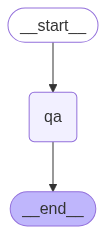

In [42]:
Image(workflow.get_graph().draw_mermaid_png())